**What is Plagiarism detection?

1. Importing Libraries
2. Listing and Reading Files
3. TF-IDF Vectorization
4. Calculating Cosine Similarity
5. Creating Document-vector Pairs
6. Checking Plagiarism
7. Word Cloud Visualization
8. Conclusion


In [11]:
import os 
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity 
from wordcloud import WordCloud

In [13]:

# Get a list of student files 
student_file = [file for file in os.listdir() if file.endswith('.txt')] 
  
# Read the content of each student's file 
student_docs = [open(file).read() for file in student_file] 
  
# Print the list of student files and their content 
for filename, document in zip(student_file, student_docs): 
    print(f"File: {filename}") 
    print("Content:") 
    print(document) 
    print("-" * 30)  # Separator between documents 


File: space_3.txt
Content:
In article <28641@galaxy.ucr.edu> datadec@ucrengr.ucr.edu (kevin marcus) writes:
>Are there any public domain or shareware astronomy programs which will
>map out the sky at any given time, and allow you to locate planets, nebulae,
>and so forth?  If so, is there any ftp site where I can get one?
I posted my public-domain MSDOS program "sunlight.zip" to "sci.astro" yesterday.
It easily locates the sun, moon, and planets, and can also be used to
locate other objects if you input their Right Ascesion and Declination.
Use "uudecode" to extract.
        Robert Sheaffer - Scepticus Maximus - sheaffer@netcom.com
 Past Chairman, The Bay Area Skeptics - for whom I speak only when authorized!
         "Marxism and feminism are one and that one is Marxism"
                             - Heidi Hartmann and Amy Bridges,
                       quoted by Catharine MacKinnon above the first chapter
                       of her "Toward a Feminist Theory of the State"

------

In [14]:
# Function to create TF-IDF vectors from a list of documents 
def create_tfidf_vectors(docs): 
	return TfidfVectorizer().fit_transform(docs).toarray() 


In [15]:
# Function to calculate cosine similarity between two document vectors 
def calc_cosine_similarity(vector1, vector2): 
	return cosine_similarity([vector1, vector2]) 


In [16]:
# Create TF-IDF vectors for the student documents 
doc_vec = create_tfidf_vectors(student_docs) 
# Pair each document with its corresponding filename 
doc_filename_pairs = list(zip(student_file, doc_vec)) 


In [17]:
# Function to check for plagiarism 
def find_plagiarism(): 
	# Initialize an empty set to store plagiarism results 
	plagiarism_results = set() 

	# Access the global variable doc_filename_pairs 
	global doc_filename_pairs 

	# Iterate through each student's file and vector 
	for student_a_file, student_a_vec in doc_filename_pairs: 
		# Create a copy of the document-filename pairs for iteration 
		remaining_pairs = doc_filename_pairs.copy() 

		# Find the index of the current document-filename pair 
		current_index = remaining_pairs.index((student_a_file, student_a_vec)) 

		# Remove the current pair from the remaining pairs 
		del remaining_pairs[current_index] 

		# Iterate through the remaining pairs to compare with other students 
		for student_b_file, student_b_vec in remaining_pairs: 
			# Calculate the cosine similarity between student_a_vec and student_b_vec 
			similarity_score = calc_cosine_similarity( 
				student_a_vec, student_b_vec)[0][1] 

			# Sort the filenames to maintain consistency in results 
			sorted_filenames = sorted((student_a_file, student_b_file)) 

			# Create a plagiarism result tuple with sorted filenames and similarity score 
			plagiarism_result = ( 
				sorted_filenames[0], sorted_filenames[1], similarity_score) 

			# Add the result to the plagiarism_results set 
			plagiarism_results.add(plagiarism_result) 

	# Return the set of plagiarism results 
	return plagiarism_results 


# Print plagiarism results 
plagiarism_results = find_plagiarism() 
for result in plagiarism_results: 
	print(result) 


('space_3.txt', 'space_4.txt', 0.2788606628055472)
('space_1.txt', 'space_2.txt', 0.26754327271165373)
('space_2.txt', 'space_4.txt', 0.24767066250036784)
('space_2.txt', 'space_3.txt', 0.15925416159415198)
('space_1.txt', 'space_3.txt', 0.2478240007211111)
('space_1.txt', 'space_4.txt', 0.25163544181542064)


In [23]:
# Function to generate a word cloud for a document 
def generate_word_cloud(document_text, filename): 
	# Create a word cloud from the document text 
	wordcloud = WordCloud(width=800, height=400).generate(document_text) 

	# Create a figure to display the word cloud 
	plt.figure(figsize=(8, 4)) 

	# Display the word cloud as an image with bilinear interpolation 
	plt.imshow(wordcloud, interpolation='bilinear') 

	# Set the title of the word cloud figure to include the filename 
	plt.title(f'Word Cloud for {filename}') 

	# Turn off axis labels and ticks 
	plt.axis('off') 

	# Show the word cloud visualization 
	plt.show() 


# Find plagiarism among student documents and store the results 
plagiarism_results = find_plagiarism() 

# Iterate through plagiarism results 
for result in plagiarism_results: 
	# Check if the similarity score is greater than or equal to 0.5 (adjust as needed) 
	if result[2] >= 0.5: 
		# Generate and display a word cloud for the document with similarity above the threshold 
		generate_word_cloud(open(result[0]).read(), result[0]) 


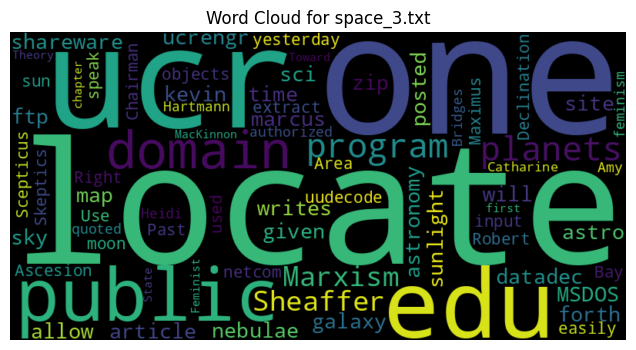

In [19]:
# Specify the target document filename 
target_document = "space_3.txt"

# Iterate through pairs of filenames and document vectors 
for filename, document_vector in doc_filename_pairs: 
	# Check if the current filename matches the target_document 
	if filename == target_document: 
		# Generate a word cloud for the target document 
		generate_word_cloud(open(filename).read(), filename) 


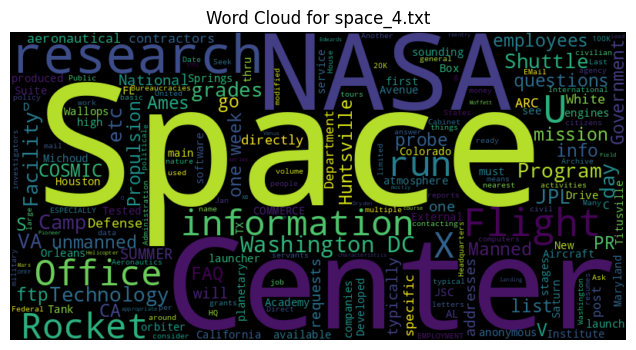

In [20]:
# Specify the target document filename 
target_document = "space_4.txt"

# Iterate through pairs of filenames and document vectors 
for filename, document_vector in doc_filename_pairs: 
	# Check if the current filename matches the target_document 
	if filename == target_document: 
		# Generate a word cloud for the target document 
		generate_word_cloud(open(filename).read(), filename) 
